**Objective:**

The goal of this project was to build predictive models to forecast weekly sales for Walmart stores, taking into account various factors such as holidays, economic indicators, and promotional events.

**Dataset:**

Utilized historical sales data from 45 Walmart stores, covering sales from February 2010 to November 2012. The dataset included the following features:

- Store Number

- Date of Sales

- Weekly Sales Amount

- Holiday Flag (indicating if the week includes a holiday)

- Temperature

- Fuel Price

- Consumer Price Index (CPI)

- Unemployment Rate


**Challenges:**

- Unforeseen demand fluctuations led to stock shortages.

- Holiday weeks required special attention due to their significant impact on sales.

- Incomplete historical data for certain promotional events and economic factors.

# Data Exploration


In [ ]:
#Load the dataset
import pandas as pd

data = pd.read_csv('/content/Walmart_Sales.csv')

In [ ]:
#Display first few row
print(data.head())

   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  


In [ ]:
#Display the information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB
None


In [ ]:
#Basic description statistics
print(data.describe())

             Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.533501e+05      0.000000    47.460000     2.933000   
50%      23.000000  9.607460e+05      0.000000    62.670000     3.445000   
75%      34.000000  1.420159e+06      0.000000    74.940000     3.735000   
max      45.000000  3.818686e+06      1.000000   100.140000     4.468000   

               CPI  Unemployment  
count  6435.000000   6435.000000  
mean    171.578394      7.999151  
std      39.356712      1.875885  
min     126.064000      3.879000  
25%     131.735000      6.891000  
50%     182.616521      7.874000  
75%     212.743293      8.622000  
max     227.232807     14.313000  


In [ ]:
#Check the missing values
print(data.isnull().sum())

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


# Data Preprocessing



In [ ]:
# Handle missing values (if any)
data.fillna(method='ffill', inplace=True)

# Encode categorical variables if needed (e.g., Store, Holiday_Flag)
data['Store'] = data['Store'].astype('category')
data['Holiday_Flag'] = data['Holiday_Flag'].astype('category')


<ipython-input-18-87a73c606127>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


# Graphical Representation of Key Findings

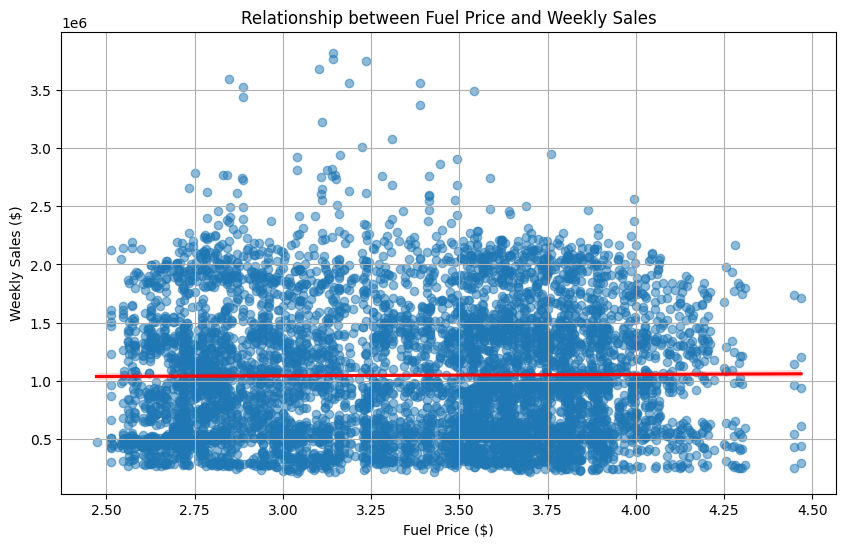

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Walmart sales dataset
data = pd.read_csv('/content/Walmart_Sales.csv')

plt.figure(figsize=(10, 6))
sns.regplot(data=data, x='Fuel_Price', y='Weekly_Sales', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Relationship between Fuel Price and Weekly Sales')
plt.xlabel('Fuel Price ($)')
plt.ylabel('Weekly Sales ($)')
plt.grid()
plt.show()


<ipython-input-8-7ede7dc4701b>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_sales_temp = data.groupby('Temp_Bin')['Weekly_Sales'].mean().reset_index()
<ipython-input-8-7ede7dc4701b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_sales_temp, x='Temp_Bin', y='Weekly_Sales', palette='coolwarm')


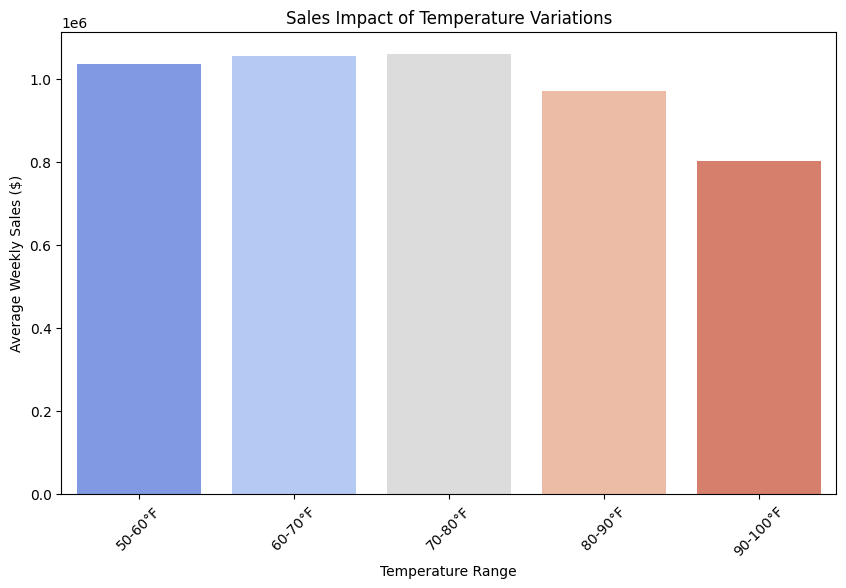

In [8]:
# Grouping temperature into bins and calculating average sales
bins = [50, 60, 70, 80, 90, 100]
labels = ['50-60°F', '60-70°F', '70-80°F', '80-90°F', '90-100°F']
data['Temp_Bin'] = pd.cut(data['Temperature'], bins=bins, labels=labels)

average_sales_temp = data.groupby('Temp_Bin')['Weekly_Sales'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=average_sales_temp, x='Temp_Bin', y='Weekly_Sales', palette='coolwarm')
plt.title('Sales Impact of Temperature Variations')
plt.xlabel('Temperature Range')
plt.ylabel('Average Weekly Sales ($)')
plt.xticks(rotation=45)
plt.show()


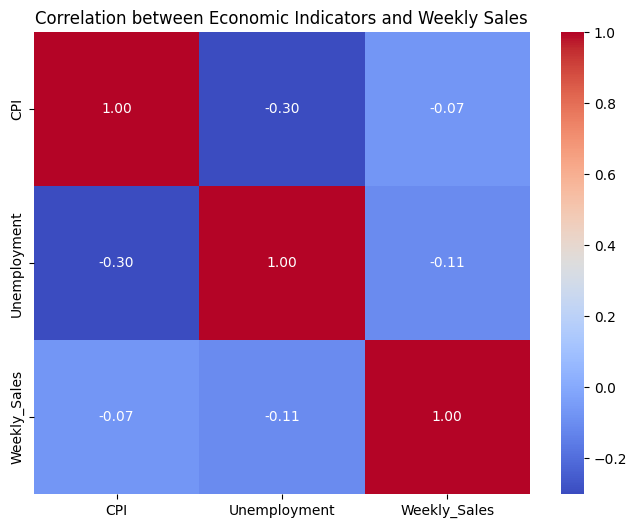

In [3]:
# Sample DataFrame assuming columns 'CPI', 'Unemployment', and 'Weekly_Sales' exist
economic_data = data[['CPI', 'Unemployment', 'Weekly_Sales']].dropna()

plt.figure(figsize=(8, 6))
correlation_matrix = economic_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Economic Indicators and Weekly Sales')
plt.show()


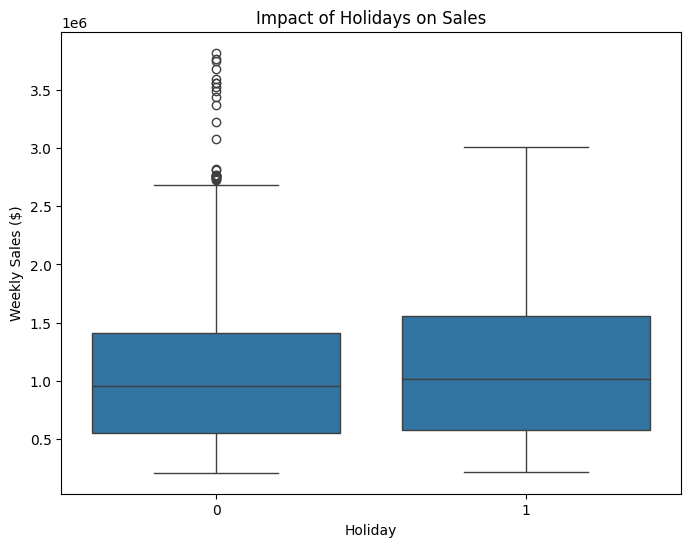

In [6]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Holiday_Flag', y='Weekly_Sales')
plt.title('Impact of Holidays on Sales')
plt.xlabel('Holiday')
plt.ylabel('Weekly Sales ($)')
plt.show()


<ipython-input-7-24feb627a61b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_stores, x='Store', y='Weekly_Sales', palette='viridis')


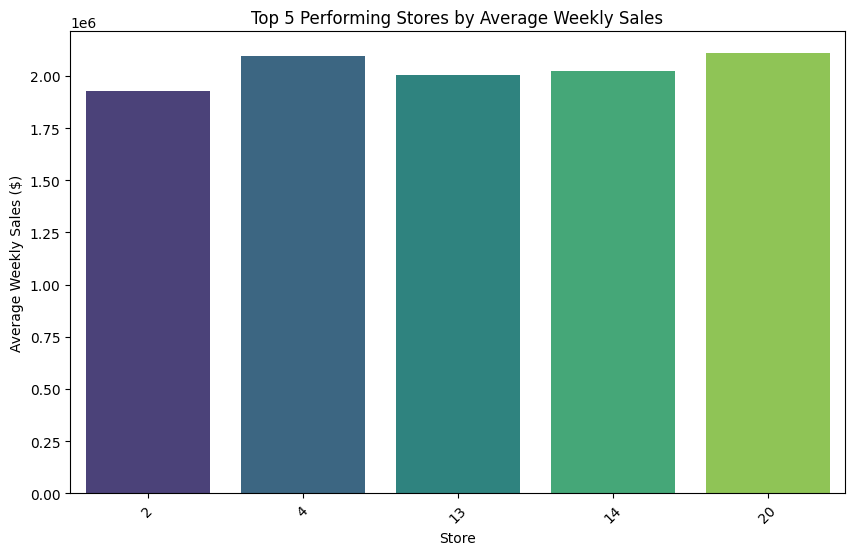

In [7]:
# Assuming there's a 'Store' column in the dataset
store_data = data.groupby('Store')['Weekly_Sales'].mean().reset_index()
top_stores = store_data.nlargest(5, 'Weekly_Sales')

plt.figure(figsize=(10, 6))
sns.barplot(data=top_stores, x='Store', y='Weekly_Sales', palette='viridis')
plt.title('Top 5 Performing Stores by Average Weekly Sales')
plt.xlabel('Store')
plt.ylabel('Average Weekly Sales ($)')
plt.xticks(rotation=45)
plt.show()


# Exploratory Data Analysis






In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Convert the date column in datatime format
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y') # Changed the format to match the actual format of the dates

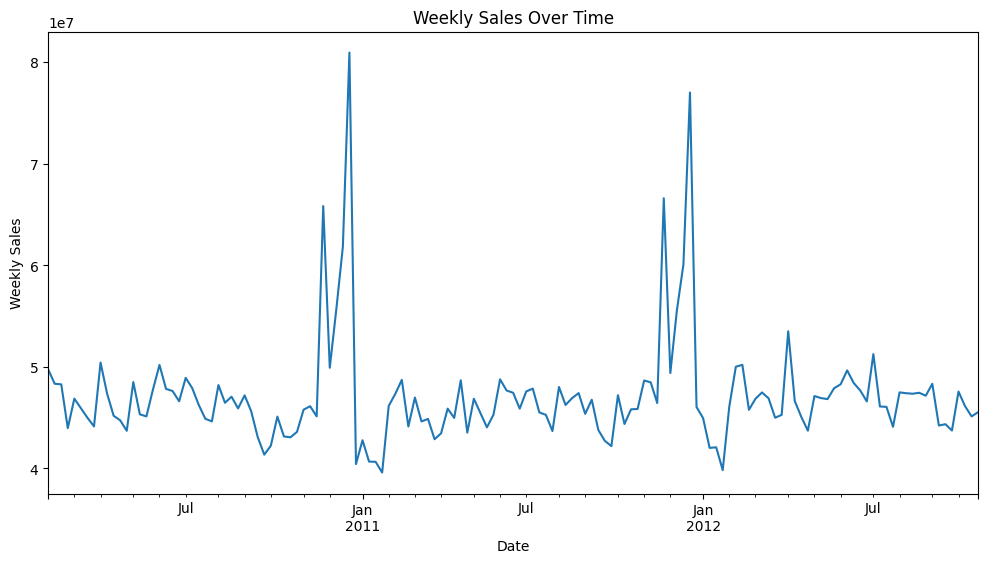

In [ ]:
#Plot weekly sales over time
plt.figure(figsize = (12,6))
data.groupby('Date')['Weekly_Sales'].sum().plot()
plt.title('Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()

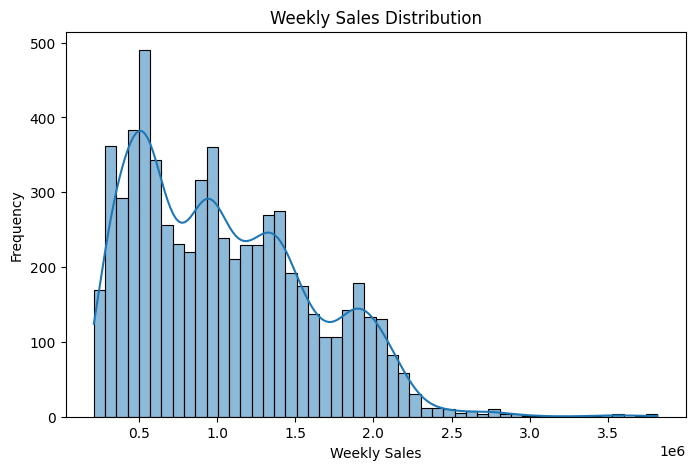

In [ ]:
#Sales Distribution
plt.figure(figsize = (8,5))
sns.histplot(data['Weekly_Sales'], bins = 50, kde = True)
plt.title('Weekly Sales Distribution')
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.show()

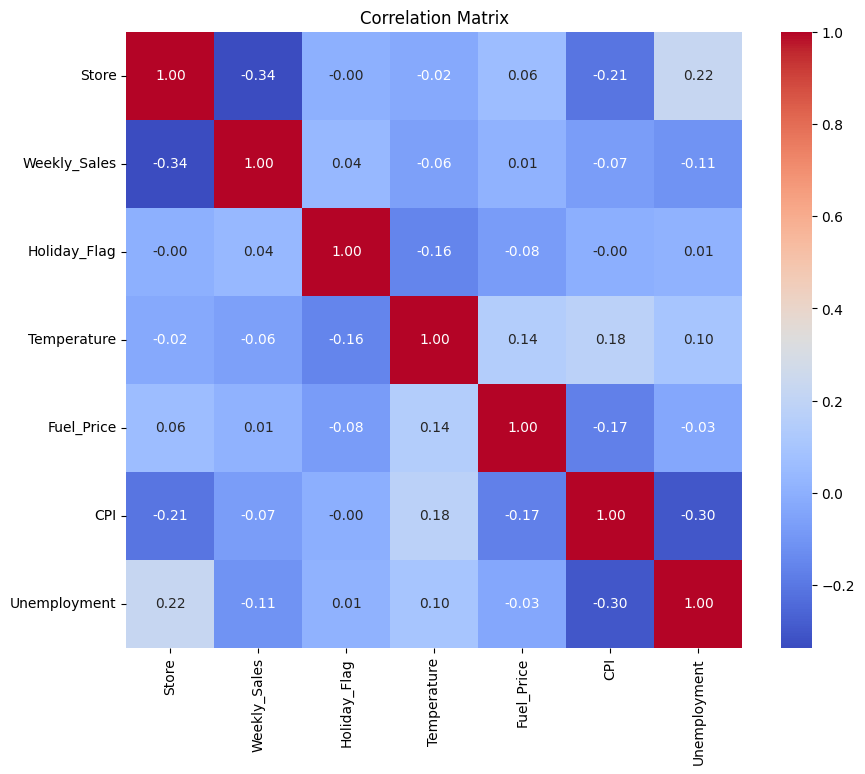

In [ ]:
#Correlation matrix to understand the relationship between each variables
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()


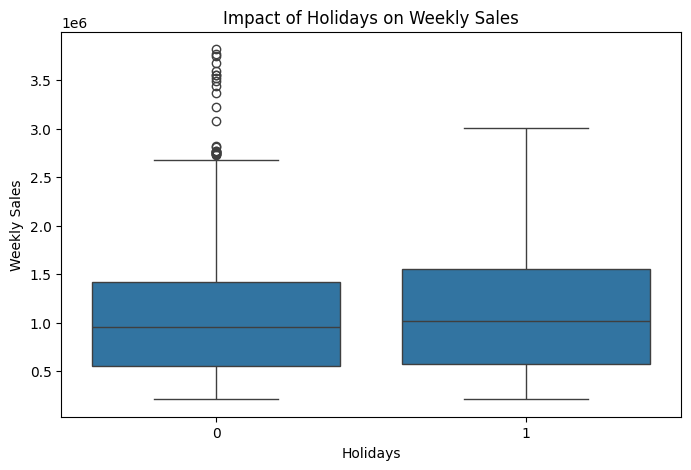

In [ ]:
#Boxplot for holiday impact
plt.figure(figsize = (8,5))
sns.boxplot(x = 'Holiday_Flag', y = 'Weekly_Sales', data = data)
plt.title('Impact of Holidays on Weekly Sales')
plt.xlabel('Holidays')
plt.ylabel('Weekly Sales')
plt.show()

# Feature Selection


In [ ]:
#Selecting Features and Target Variables
features = ['Store', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Holiday_Flag']
target = 'Weekly_Sales'

X = data[features]
Y = data[target]

#Converting Catagorical variables into dummy variables
X= pd.get_dummies(X, drop_first = True)

#pd.get_dummies: Converts categorical variables into numerical format using one-hot encoding. This is essential for machine learning algorithms that require numerical input.

# Predictive Modeling


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
#Split the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [ ]:
#Build a linear regression model
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
#Make predictions
y_pred = model.predict(X_test)
print(y_pred)

[1104743.25804351 1323293.8375257  1925777.4582507  ...  809693.06833667
 1917629.13521457  901718.20307965]


- **mean_squared_error**: Calculates the root mean squared error (RMSE), which measures the average magnitude of errors in predictions.

- **r2_score**: Measures how well the model explains the variability of the data; a value closer to 1 indicates a better fit.

In [ ]:
#Evaluate the model
rmse = mean_squared_error(Y_test, y_pred, squared = False)
r2 = r2_score(Y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'R^2: {r2}')

RMSE: 159683.96837838134
R^2: 0.9208486467169621


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# Comparing Multiple Models

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
#Random Forest Model

rf_model = RandomForestRegressor()
rf_model.fit(X_train, Y_train)
rf_pred = rf_model.predict(X_test)

In [ ]:
#Evaluate the model
rf_rmse = mean_squared_error(Y_test, rf_pred, squared = False)
rf_r2 = r2_score(Y_test, rf_pred)

print(f'Random Forest RMSE: {rf_rmse}')
print(f'Random Forest R^2: {rf_r2}')

Random Forest RMSE: 150051.04451891387
Random Forest R^2: 0.9301102066121106


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
